# Import Libraries

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, r2_score

# Make dataset

In [33]:
X, y = make_classification(n_samples=100, n_features=2, n_informative=1,n_redundant=0,
                           n_classes=2, n_clusters_per_class=1, random_state=41,hypercube=False,class_sep=30)

# Show dataset

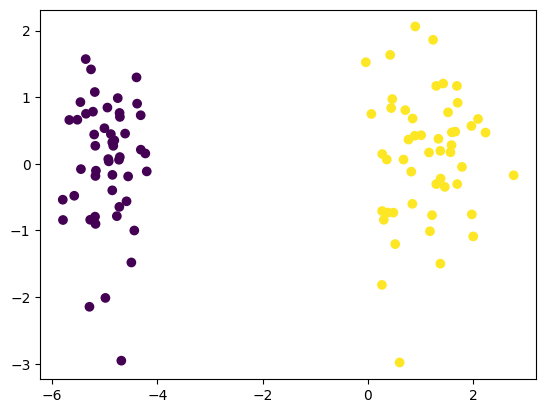

In [34]:
plt.scatter(X[:,0],X[:,1],c=y)
plt.show()

# Train test split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=41)

# Apply Logistic Regression

In [36]:
reg1 = LogisticRegression()
reg1.fit(X_train,y_train)
r2_score(y_test,reg1.predict(X_test))

1.0

In [37]:
reg1.intercept_, reg1.coef_

(array([3.40771648]), array([[1.71049602, 0.030481  ]]))

## Draw Graph Line

In [38]:
m = -(reg1.coef_[0][0]/reg1.coef_[0][1])
b = -(reg1.intercept_/reg1.coef_[0][1])

x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

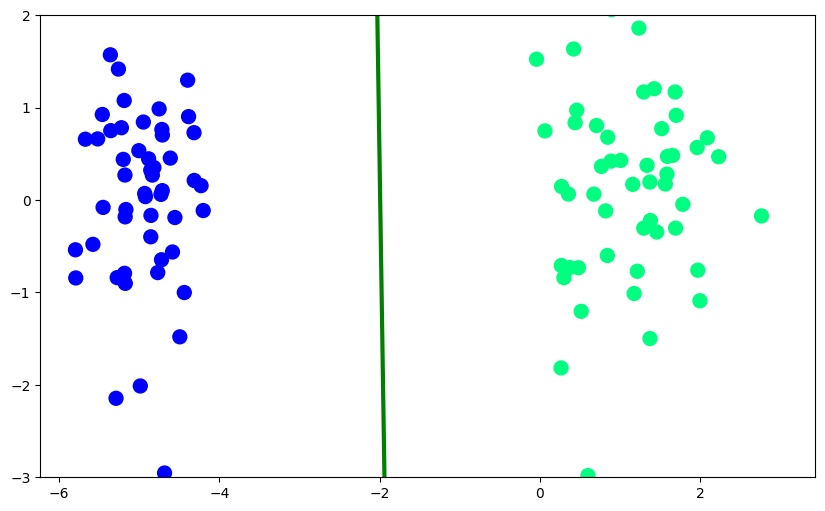

In [39]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='green',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

# Perceptron Trick

In [40]:
def perceptron(X,y):

    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1

    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = step(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]

    return weights[0],weights[1:]

def step(z):
    return 1 if z>0 else 0

In [41]:
intercept_,coef_ = perceptron(X,y)
intercept_,coef_

(np.float64(1.3000000000000003), array([1.1134548 , 0.33857969]))

## Build Graph

In [42]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

x_input1 = np.linspace(-3,3,100)
y_input1 = m*x_input + b

(-3.0, 2.0)

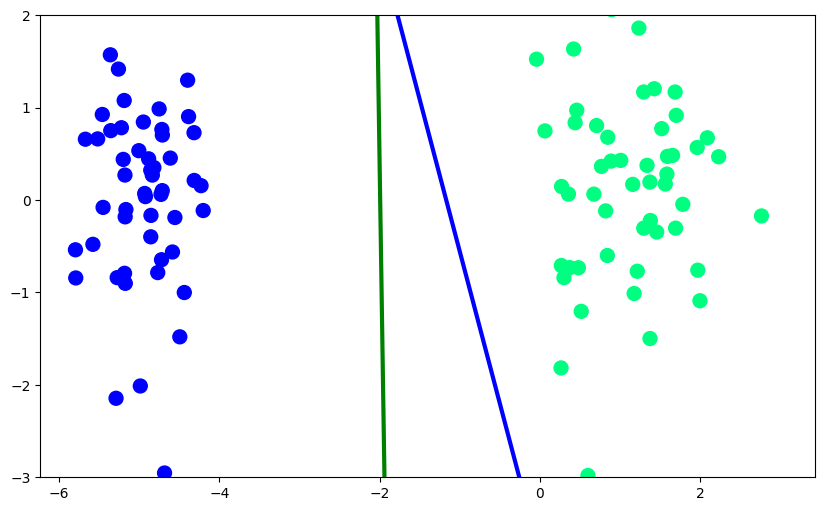

In [43]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='green',linewidth=3)
plt.plot(x_input1,y_input1,color='blue',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

# Sigmoid Trick

In [44]:

def perceptron(X,y):
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1

    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = sigmoid(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]

    return weights[0],weights[1:]

def sigmoid(z):
    return 1/(1 + np.exp(-z))

In [45]:
intercept_,coef_ = perceptron(X,y)
intercept_, coef_

(np.float64(2.5524527368944576), array([2.29410173, 0.23317188]))

## Draw Line Graph

In [46]:
m = -(coef_[0]/coef_[1])
b = -(intercept_/coef_[1])

x_input2 = np.linspace(-3,3,100)
y_input2 = m*x_input + b

(-3.0, 2.0)

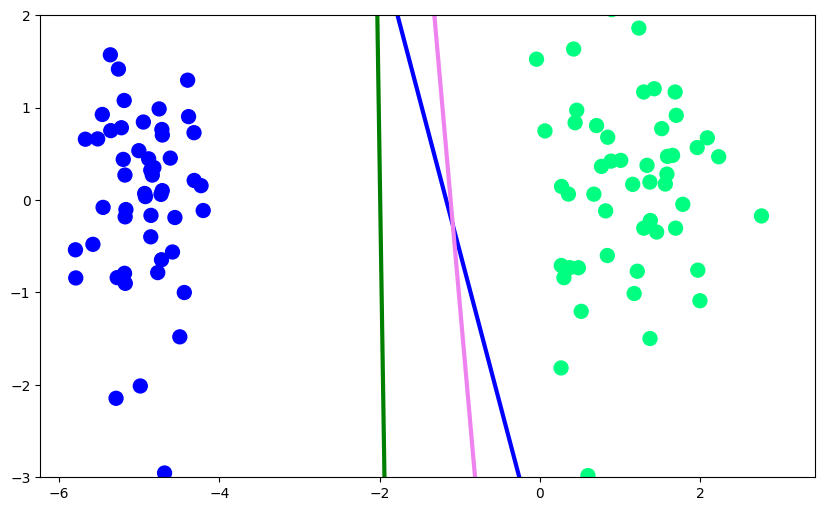

In [49]:
plt.figure(figsize=(10,6))
plt.plot(x_input,y_input,color='green',linewidth=3)
plt.plot(x_input1,y_input1,color='blue',linewidth=3)
plt.plot(x_input2,y_input2,color='violet',linewidth=3)
plt.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
plt.ylim(-3,2)

# Create Annimation

In [55]:
def perceptron(X,y):

    m = []
    b = []

    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1

    for i in range(200):
        j = np.random.randint(0,100)
        y_hat = sigmoid(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]

        m.append(-(weights[1]/weights[2]))
        b.append(-(weights[0]/weights[2]))

    return m,b

In [56]:
m,b = perceptron(X,y)

In [57]:
%matplotlib notebook
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

In [58]:
fig, ax = plt.subplots(figsize=(9,5))

x_i = np.arange(-3, 3, 0.1)
y_i = x_i*m[0] +b[0]
ax.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
line, = ax.plot(x_i, x_i*m[0] +b[0] , 'r-', linewidth=2)
plt.ylim(-3,3)
def update(i):
    label = 'epoch {0}'.format(i + 1)
    line.set_ydata(x_i*m[i] + b[i])
    ax.set_xlabel(label)
    # return line, ax

anim = FuncAnimation(fig, update, repeat=True, frames=200, interval=100)
anim.save('perceptron.gif', writer='imagemagick')

<IPython.core.display.Javascript object>